In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import warnings
import datetime

# import categorical api 
from pandas.api.types import CategoricalDtype
from scipy.stats import chi2_contingency

#warnings.filterwarnings("ignore")

In [2]:
file = open('../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)
data_cleaned = pd.read_csv(conf['local_data_path'] + "data_cleaned_final.csv",index_col=0,low_memory=False)

# Distribution de la variable age_usager

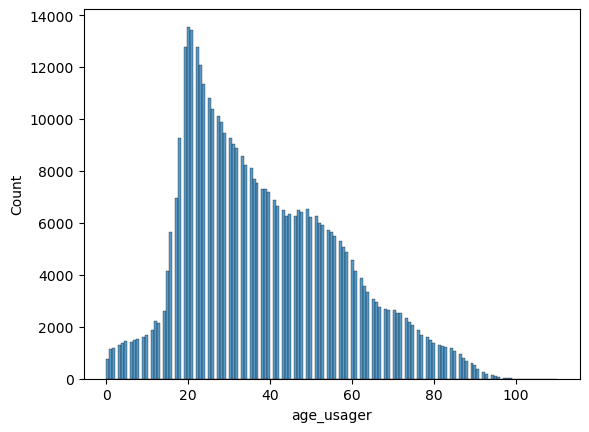

In [4]:
sns.histplot(x = 'age_usager', data=data_cleaned);

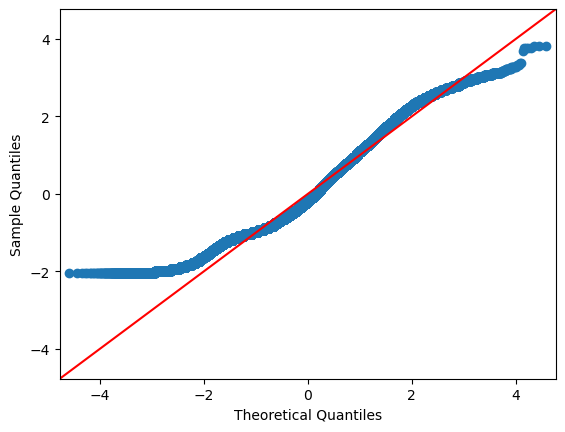

In [6]:
import statsmodels.api as sm 
sm.qqplot(data_cleaned.age_usager, fit=True, line='45');

La variable age_usager ne suit pas une distribution normale (comme cela est confirmé par le Q-Q plot)

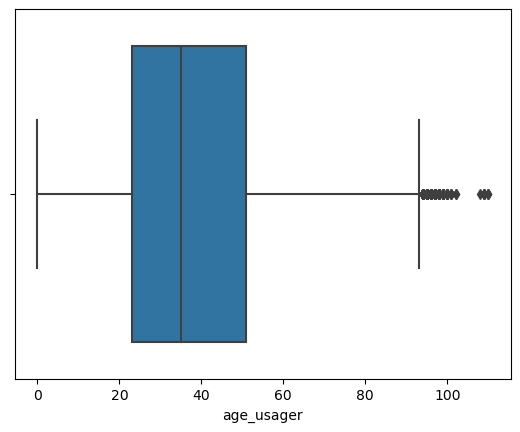

In [8]:
sns.boxplot(x = 'age_usager', data=data_cleaned);

Présence de quelques outliers mais une normalisation min-max doit rester envisageable

# Analyse des variables mois et heure

Il est recommandé (notamment dans https://blog.davidkaleko.com/feature-engineering-cyclical-features.html) de procéder à des transformations sinus/cosinus pour la normalisation des variables heures, mois. Cela a notamment pour avantage d'assurer la proximité de l'heure 24 et de l'heure 0, ainsi que du mois 12 avec le mois 1.

In [9]:
data_cleaned['hr_sin'] = np.sin(data_cleaned.heure*(2.*np.pi/24))
data_cleaned['hr_cos'] = np.cos(data_cleaned.heure*(2.*np.pi/24))
data_cleaned['mnth_sin'] = np.sin((data_cleaned.mois-1)*(2.*np.pi/12))
data_cleaned['mnth_cos'] = np.cos((data_cleaned.mois-1)*(2.*np.pi/12))

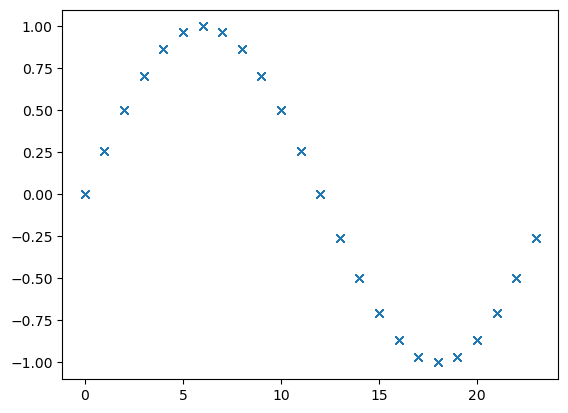

In [12]:
plt.figure()
plt.plot(data_cleaned['heure'], data_cleaned['hr_sin'], 'x')

# Distribution des variables latitude et longitude

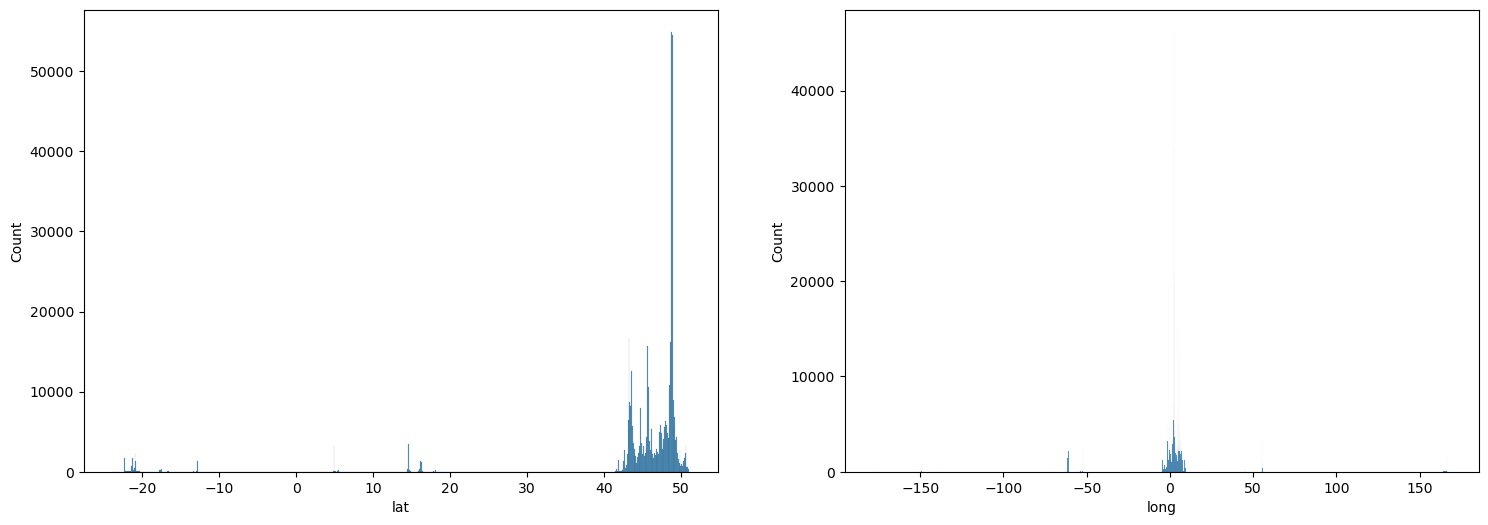

In [15]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.histplot(x = 'lat', data=data_cleaned);
plt.subplot(122)
sns.histplot(x = 'long', data=data_cleaned);

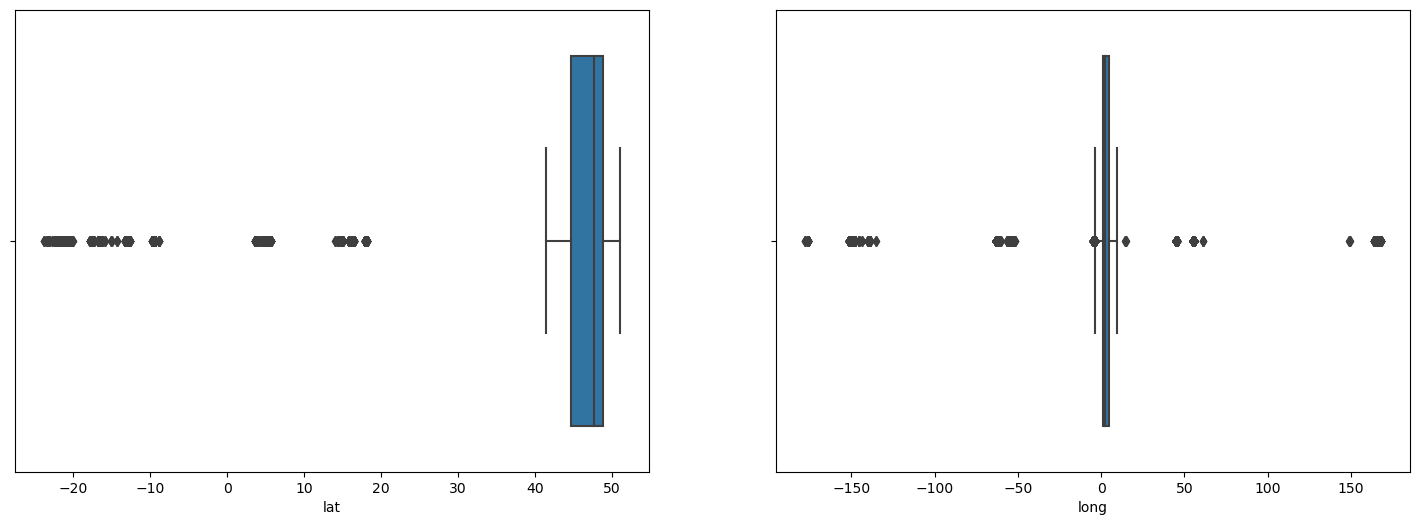

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x = 'lat', data=data_cleaned);
plt.subplot(122)
sns.boxplot(x = 'long', data=data_cleaned);


La présence des DOM-TOM dans la base de données génère des outliers dans les distributions des latitudes et longitudes. 
Si utilisation de la base de données en l'état, une gestion par Robust Scaling, moins sensible aux valeurs extrêmes, semble préférable

Si on se focalise sur la métropole

In [21]:
data_met = data_cleaned.loc[((data_cleaned.lat>=41) & (data_cleaned.lat<=52) & (data_cleaned.long>=-5.5) & (data_cleaned.long<=10)), :]

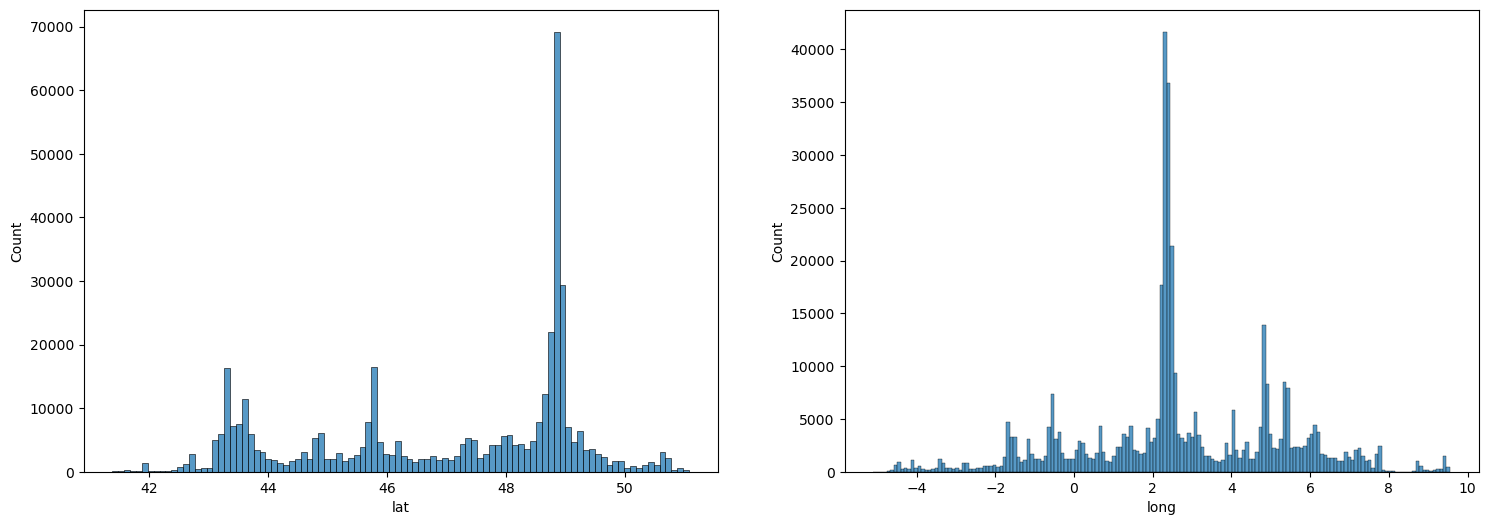

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.histplot(x = 'lat', data=data_met);
plt.subplot(122)
sns.histplot(x = 'long', data=data_met);

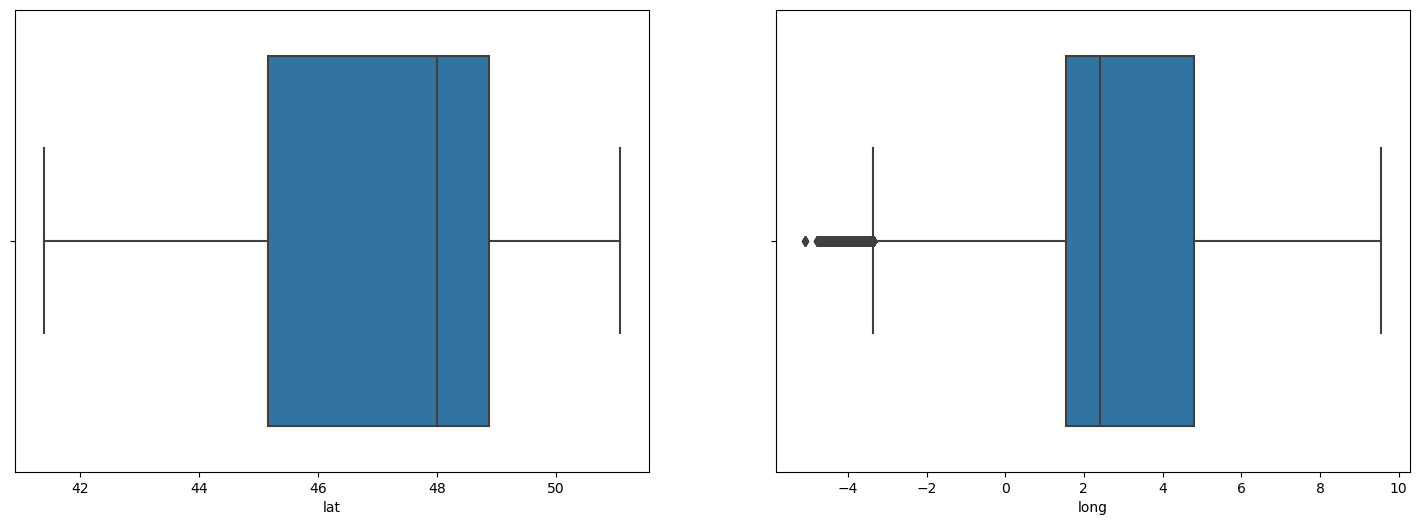

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(x = 'lat', data=data_met);
plt.subplot(122)
sns.boxplot(x = 'long', data=data_met);

Moins d'outliers mais distributions restent non normales. 
Même en dissociant éventuellement l'analyse de la métropole à celle des DOM/TOM, on a des distributions non normales.
=> processus de Robust Scaling reste ok